In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

<h1> Research Questions </h1>

In [2]:
def create_focusDF(data):
    
    percentage_goals = []
    goals_achieved = []
    goals_set = []
    broken_Focus = []
    distraction_count = []
    nr_of_services = []
    messages_received_in_focus = []
    
    # transform json part to pandas dataframe
    df = pd.json_normalize(data["focusSessions"])
    
    # create new column, which calculates how long a user stayed in focus
    df["minutesInFocus"] = round((df["endTime"] - df["startTime"])/60000,2)
    
    #df["distractionCount"] = 0

    
    for index, row in df.iterrows():
        # calculate percentage of achieved goals
        if len(row['goals']) == 0:
            percentage_goals.append(0)
            goals_set.append(0)
            goals_achieved.append(0)
        else:
            percentage_goals.append(round(len(row['completedGoals'])/len(row['goals']),2))
            goals_set.append(len(row['goals']))
            goals_achieved.append(len(row['completedGoals']))
        
        # calculate broken focus length
        if len(row["brokenFocus"]) == 0:
            broken_Focus.append(0)
        else:
            break_per_focus= 0
            for element in row["brokenFocus"]:
                if len(element) ==2:
                    break_per_focus += ((element[1]-element[0])/60000)
            broken_Focus.append(round(break_per_focus,2))
            
        # get distractionCount
        if len(row["activeWindows"]) == 0:
            distraction_count.append(0)
        else:
            distractionCountPerFocus = 0
            for element in row["activeWindows"]:
                if element["isDistraction"]:
                    distractionCountPerFocus += 1
            distraction_count.append(distractionCountPerFocus)
        
        # get number of used services
        nr_of_services.append(len(row["services"]))
        
        messages_received = 0
        for element in row["services"]:
            # get number of received messages
            messages_received += len(element["messages"])
        messages_received_in_focus.append(messages_received)
            
    
    df["distractionCount"] = distraction_count
    df["numberOfServices"] = nr_of_services
    df["messages_received_in_focus"] = messages_received_in_focus 
    df["brokenFocus"] = broken_Focus     
    df["percentageCompletedGoals"] = percentage_goals
    df["goalsAchieved"] = goals_achieved
    df["goalsSet"] = goals_set
    
    
    
    # drop columns startTime, endTime, originalEndTime, goals and completedGoals
    df = df.drop(["id","services",'startTime', 'endTime','originalEndTime','goals','completedGoals',"activeWindows"], axis=1)
    return df

In [3]:
from os import listdir
from os.path import isfile, join

mypath = "./data"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

df = pd.DataFrame()

for i in onlyfiles:
    with open(f'data/{i}', 'r') as outfile:
        data = json.load(outfile)
        df_temp = create_focusDF(data)
        df = pd.concat([df,df_temp])

df = df.reset_index()

In [4]:
df

,index,brokenFocus,rating,comments,scheduled,appVersion,calendarSubject,minutesInFocus,distractionCount,numberOfServices,messages_received_in_focus,percentageCompletedGoals,goalsAchieved,goalsSet
0,0,0.00,6,None,False,exman,None,40.00,0,2,1,0.62,5,8
1,1,1.23,4,None,False,exman,None,25.00,0,2,0,0.33,1,3
2,2,0.00,None,None,False,exman,None,55.00,0,2,0,1.00,4,4
3,3,0.00,5,None,False,exman,None,15.00,0,2,1,0.00,0,1
4,4,0.00,5,None,False,exman,None,35.00,0,3,0,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,12,0.00,7,None,False,exman,None,120.00,0,4,4,0.50,1,2
247,13,0.00,7,None,False,exman,None,30.00,0,4,0,1.00,1,1
248,14,0.00,4,None,False,exman,None,90.00,0,4,0,0.50,1,2
249,15,1.62,7,None,False,exman,None,107.61,0,4,1,1.00,2,2


<h2>What is the effect of notification blocking and distraction discouragements during a user defined time period on their perceived productivity?</h2>


Summary page rating

In [5]:
pomodoro = df[(df['appVersion'] == "pomodoro") & (df["minutesInFocus"] < 300)]
exman = df[(df['appVersion'] == "exman") & (df["minutesInFocus"] < 300)]

In [6]:
exman

,index,brokenFocus,rating,comments,scheduled,appVersion,calendarSubject,minutesInFocus,distractionCount,numberOfServices,messages_received_in_focus,percentageCompletedGoals,goalsAchieved,goalsSet
0,0,0.00,6,None,False,exman,None,40.00,0,2,1,0.62,5,8
1,1,1.23,4,None,False,exman,None,25.00,0,2,0,0.33,1,3
2,2,0.00,None,None,False,exman,None,55.00,0,2,0,1.00,4,4
3,3,0.00,5,None,False,exman,None,15.00,0,2,1,0.00,0,1
4,4,0.00,5,None,False,exman,None,35.00,0,3,0,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,12,0.00,7,None,False,exman,None,120.00,0,4,4,0.50,1,2
247,13,0.00,7,None,False,exman,None,30.00,0,4,0,1.00,1,1
248,14,0.00,4,None,False,exman,None,90.00,0,4,0,0.50,1,2
249,15,1.62,7,None,False,exman,None,107.61,0,4,1,1.00,2,2


In [7]:
pomodoro

,index,brokenFocus,rating,comments,scheduled,appVersion,calendarSubject,minutesInFocus,distractionCount,numberOfServices,messages_received_in_focus,percentageCompletedGoals,goalsAchieved,goalsSet
18,18,0.0,None,None,False,pomodoro,None,25.00,0,3,1,1.00,2,2
19,19,0.0,6,None,False,pomodoro,None,25.00,0,3,0,1.00,2,2
20,20,0.0,None,None,False,pomodoro,None,110.91,0,3,16,1.00,3,3
21,21,0.0,4,None,False,pomodoro,None,40.00,0,3,0,0.00,0,4
22,22,0.0,6,None,False,pomodoro,None,25.00,0,3,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,5,0.0,5,None,False,pomodoro,None,30.00,0,4,0,1.00,1,1
240,6,0.0,5,None,False,pomodoro,None,57.82,0,4,0,0.50,1,2
241,7,0.0,6,None,False,pomodoro,None,120.00,0,4,6,0.67,2,3
242,8,0.0,5,None,False,pomodoro,None,60.00,0,4,2,0.00,0,1


In [8]:
exman["rating"].dropna().astype(int).mean()

5.87962962962963

In [9]:
pomodoro["rating"].dropna().astype(int).mean()

5.74

In [10]:
#t-test if difference is significant

In [11]:
exman = exman.dropna(subset=["rating"])
pomodoro = pomodoro.dropna(subset=["rating"])

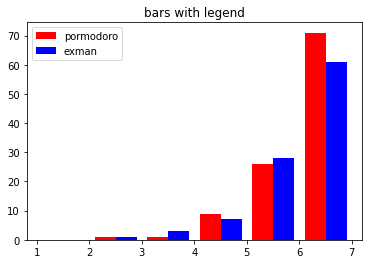

In [12]:
bins = [1,2,3,4,5,6,7]
x = [list(exman["rating"].astype(int)),list(pomodoro["rating"].astype(int))]

label = ["pormodoro", "exman"]
colors = ['red', 'blue']
plt.hist(x, bins, histtype='bar', color=colors, label=label)
plt.legend(prop={'size': 10})
plt.title('bars with legend')


plt.show()

In [13]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["rating"].astype(int), pomodoro["rating"].astype(int), equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.35754869663383637 T-Statistic:0.9221360950279618


The p-Value and the t-test is not significant. Therefore, we cannot assume, that exman provides an improvement of the productivity compared to the pomodoro baseline.

goals achieved

In [14]:
exman["goalsAchievedPerHour"] = exman["goalsAchieved"]/exman["minutesInFocus"]*60
pomodoro["goalsAchievedPerHour"] = pomodoro["goalsAchieved"]/pomodoro["minutesInFocus"]*60

C:\Users\lutha\Anaconda3\envs\data science\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lutha\Anaconda3\envs\data science\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
exman

,index,brokenFocus,rating,comments,scheduled,appVersion,calendarSubject,minutesInFocus,distractionCount,numberOfServices,messages_received_in_focus,percentageCompletedGoals,goalsAchieved,goalsSet,goalsAchievedPerHour
0,0,0.00,6,None,False,exman,None,40.00,0,2,1,0.62,5,8,7.500000
1,1,1.23,4,None,False,exman,None,25.00,0,2,0,0.33,1,3,2.400000
3,3,0.00,5,None,False,exman,None,15.00,0,2,1,0.00,0,1,0.000000
4,4,0.00,5,None,False,exman,None,35.00,0,3,0,0.00,0,1,0.000000
5,5,0.00,4,None,False,exman,None,25.00,0,3,9,0.00,0,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,12,0.00,7,None,False,exman,None,120.00,0,4,4,0.50,1,2,0.500000
247,13,0.00,7,None,False,exman,None,30.00,0,4,0,1.00,1,1,2.000000
248,14,0.00,4,None,False,exman,None,90.00,0,4,0,0.50,1,2,0.666667
249,15,1.62,7,None,False,exman,None,107.61,0,4,1,1.00,2,2,1.115138


In [16]:
exman["goalsAchievedPerHour"].mean()

1.949023248702642

In [17]:
pomodoro["goalsAchievedPerHour"].mean()

1.4406463605615896

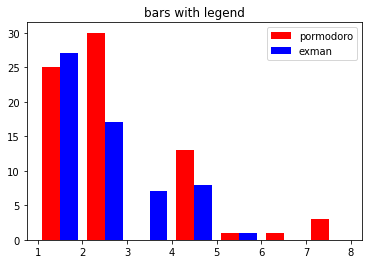

In [18]:
bins = [1,2,3,4,5,6,7,8]
x = [list(exman["goalsAchievedPerHour"]),list(pomodoro["goalsAchievedPerHour"])]

label = ["pormodoro", "exman"]
colors = ['red', 'blue']
plt.hist(x, bins,  histtype='bar', color=colors, label=label)
plt.legend(prop={'size': 10})
plt.title('bars with legend')


plt.show()

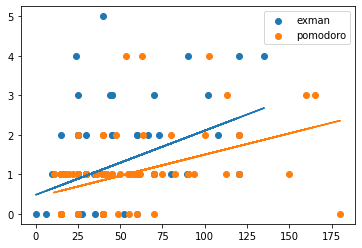

In [19]:
plt.scatter(exman["minutesInFocus"],exman["goalsAchieved"],label="exman")
plt.scatter(pomodoro["minutesInFocus"],pomodoro["goalsAchieved"], label="pomodoro")
plt.legend()

slope, intercept, r, p, stderr = scipy.stats.linregress(exman["minutesInFocus"], exman["goalsAchieved"])
plt.plot(exman["minutesInFocus"], intercept + slope * exman["minutesInFocus"])

slope, intercept, r, p, stderr = scipy.stats.linregress(pomodoro["minutesInFocus"], pomodoro["goalsAchieved"])
plt.plot(pomodoro["minutesInFocus"], intercept + slope * pomodoro["minutesInFocus"])

In [20]:
from scipy import stats
tStat, pValue = stats.ttest_ind(exman["goalsAchievedPerHour"], pomodoro["goalsAchievedPerHour"], equal_var = False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.027199023923273297 T-Statistic:2.22535900006013


The p-value is significant. Therefore, the user was more effective using our app exman than using the pomodoro timer.